# Data Wrangling-II

Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats


In [2]:
data=pd.read_csv('tecdiv (1).csv')
data

,Timestamp,Email Address,Name,Email,Roll no,PRN No.,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
0,1/17/2022 12:45:09,sejal.zambare19@pccoepune.org,Sejal Zambare,sejal.zambare19@gmail.com,TECOC359,72026841K,8208217782,8.40,8.60,9.80,9.90
1,1/17/2022 12:45:44,rushikesh.thorat19@pccoepune.org,Rushikesh Vilas Thorat,rushikesh.thorat19@pccoepune.org,TECOC347,72026776F,9021261925,8.14,8.14,9.32,9.82
2,1/17/2022 12:46:10,atharv.sontakke19@pccoepune.org,Atharv Sontakke,atharv123sontakke@gmail.com,TECOC340,72026742M,9009804629,6.61,6.61,9.14,9.14
3,1/17/2022 12:46:21,amisha.sherekar19@pccoepune.org,Amisha Sunil Sherekar,amisha.sherekar19@pccoepune.org,TECOC328,72026696D,8698227548,7.20,7.30,8.90,9.20
4,1/17/2022 12:46:31,saurabh.sawardekar19@pccoepune.org,Saurabh Raju Sawardekar,saurabh.sawardekar19@pccoepune.org,TECOC326,72026682D,7774072850,7.05,7.45,9.05,9.40
...,...,...,...,...,...,...,...,...,...,...,...
59,1/20/2022 9:24:40,pratik.meshram20@pccoepune.org,Pratik Amrut Meshram,pratik.meshram20@pccoepune.org,TECOC381,72164278M,7666479857,0.00,0.00,9.09,9.36
60,1/20/2022 9:36:14,prasad.zore19@pccoepune.org,Prasad Zore,prasad.zore@outlook.com,TECOC360,72026843F,7387645749,8.31,8.27,9.45,9.77
61,1/20/2022 9:42:34,sudhir.varu19@pccoepune.org,SUDHIR VARU,sudhirvaru01@gmail.com,TECOC351,72026799E,9657017250,8.31,8.42,8.53,8.64
62,1/20/2022 10:22:05,bhagyashree.takale19@pccoepune.org,Bhagyashree Gorakh Takale,bbhagyashree002@gmail.com,TECOC345,72026760K,8805813576,8.70,8.50,8.70,8.80


In [3]:
data.describe()

,Mobile No.,First year: Sem 1,First year: Sem 2,Second year: Sem 1,Second year: Sem 2
count,6.400000e+01,64.000000,64.000000,64.000000,64.000000
mean,8.623097e+09,8.834219,9.095469,9.292031,9.377187
std,9.132070e+08,11.187839,11.171986,0.528523,0.495185
min,7.028870e+09,0.000000,0.000000,6.900000,7.200000
25%,7.766559e+09,7.237500,7.655000,9.050000,9.140000
50%,8.805720e+09,8.260000,8.400000,9.445000,9.450000
75%,9.335094e+09,8.802500,9.115000,9.645000,9.725000
max,9.975810e+09,95.000000,95.000000,9.910000,9.950000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             64 non-null     object 
 1   Email Address         64 non-null     object 
 2   Name                  64 non-null     object 
 3   Email                 64 non-null     object 
 4   Roll no               64 non-null     object 
 5   PRN No.               64 non-null     object 
 6   Mobile No.            64 non-null     int64  
 7   First year:   Sem 1   64 non-null     float64
 8   First year:   Sem 2   64 non-null     float64
 9   Second year:   Sem 1  64 non-null     float64
 10  Second year:   Sem 2  64 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 5.6+ KB


In [5]:
data.columns

Index(['Timestamp', 'Email Address', 'Name', 'Email', 'Roll no ', 'PRN No.',
       'Mobile No.', 'First year:   Sem 1', 'First year:   Sem 2',
       'Second year:   Sem 1', 'Second year:   Sem 2'],
      dtype='object')

In [6]:
data.shape

(64, 11)

In [7]:
data.isnull().sum()

Timestamp               0
Email Address           0
Name                    0
Email                   0
Roll no                 0
PRN No.                 0
Mobile No.              0
First year:   Sem 1     0
First year:   Sem 2     0
Second year:   Sem 1    0
Second year:   Sem 2    0
dtype: int64

# Outlier 
method-1:by box-plotting

In [8]:
#for First year:   Sem 1
Q1 = np.percentile(data['First year:   Sem 1'], 25)
Q3 = np.percentile(data['First year:   Sem 1'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['First year:   Sem 1'] < lower_bound) | (data['First year:   Sem 1'] > upper_bound)
print("outlier:",outliers)
A=outliers.sum()
if A==0:
    print("no outlier")
else:
    print("outlier is present")

outlier: 0     False
1     False
2     False
3     False
4     False
      ...  
59     True
60    False
61    False
62    False
63    False
Name: First year:   Sem 1, Length: 64, dtype: bool
outlier is present


In [9]:
#First year:   Sem 2
Q1 = np.percentile(data['First year:   Sem 2'], 25)
Q3 = np.percentile(data['First year:   Sem 2'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['First year:   Sem 2'] < lower_bound) | (data['First year:   Sem 2'] > upper_bound)
print("outlier:",outliers)
A=outliers.sum()
if A==0:
    print("no outlier")
else:
    print("outlier is present")

outlier: 0     False
1     False
2     False
3     False
4     False
      ...  
59     True
60    False
61    False
62    False
63    False
Name: First year:   Sem 2, Length: 64, dtype: bool
outlier is present


In [10]:
#Second year:   Sem 1
Q1 = np.percentile(data['Second year:   Sem 1'], 25)
Q3 = np.percentile(data['Second year:   Sem 1'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['Second year:   Sem 1'] < lower_bound) | (data['Second year:   Sem 1'] > upper_bound)
print("outlier:",outliers)
A=outliers.sum()
if A==0:
    print("no outlier")
else:
    print("outlier is present")

outlier: 0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Name: Second year:   Sem 1, Length: 64, dtype: bool
outlier is present


In [11]:
#Second year:   Sem 2
Q1 = np.percentile(data['Second year:   Sem 2'], 25)
Q3 = np.percentile(data['Second year:   Sem 2'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data['Second year:   Sem 2'] < lower_bound) | (data['Second year:   Sem 2'] > upper_bound)
print("outlier:",outliers)
A=outliers.sum()
if A==0:
    print("no outlier")
else:
    print("outlier is present")

outlier: 0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Name: Second year:   Sem 2, Length: 64, dtype: bool
outlier is present


# Tranformtion

In [12]:
data.columns

Index(['Timestamp', 'Email Address', 'Name', 'Email', 'Roll no ', 'PRN No.',
       'Mobile No.', 'First year:   Sem 1', 'First year:   Sem 2',
       'Second year:   Sem 1', 'Second year:   Sem 2'],
      dtype='object')

In [13]:
x = data['First year:   Sem 1'] 
y = data['First year:   Sem 2']

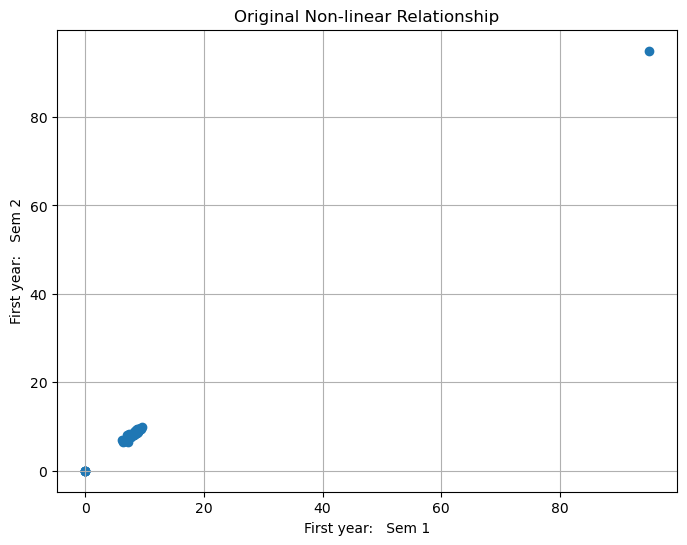

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('First year:   Sem 1')
plt.ylabel('First year:   Sem 2')
plt.title('Original Non-linear Relationship')
plt.grid(True)
plt.show()

In [15]:
transformed_x = np.sqrt(x) 

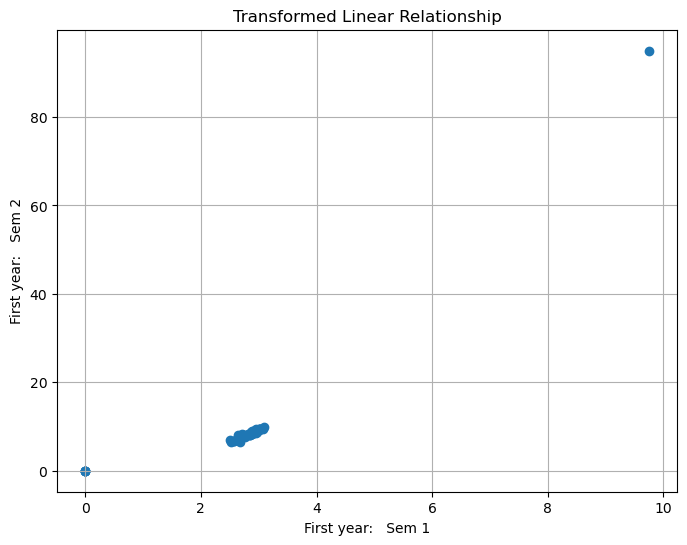

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_x, y)
plt.xlabel('First year:   Sem 1')
plt.ylabel('First year:   Sem 2')
plt.title('Transformed Linear Relationship')
plt.grid(True)
plt.show()

# Transformation
2.decrease Skewness

In [17]:
variable_to_transform = 'Second year:   Sem 1' 

Text(0.5, 1.0, 'Original Data')

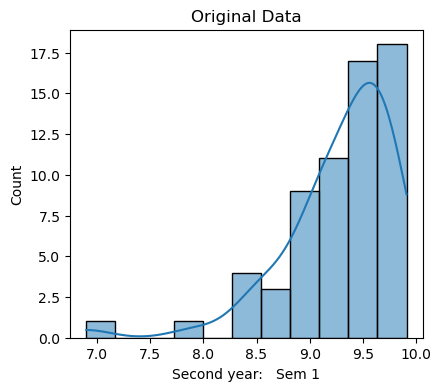

In [18]:
plt.figure(figsize=(10, 4)) 
plt.subplot(1, 2, 1)
sns.histplot(data[variable_to_transform], kde=True)
plt.title('Original Data')

In [19]:
data['log_transformed_variable'] = np.log(data[variable_to_transform] + 1)  

Text(0.5, 1.0, 'Log-Transformed Data')

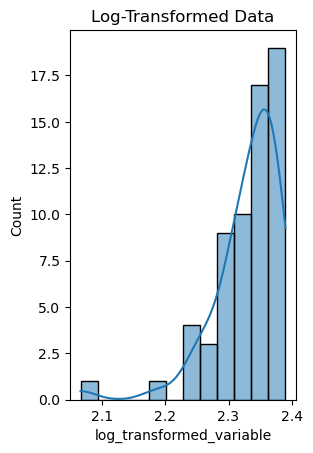

In [20]:
plt.subplot(1, 2, 2)  
sns.histplot(data['log_transformed_variable'], kde=True)
plt.title('Log-Transformed Data')

In [21]:
plt.tight_layout()
plt.show() 

<Figure size 640x480 with 0 Axes>

# Transformation
3.convert Distribution to normal Distribution

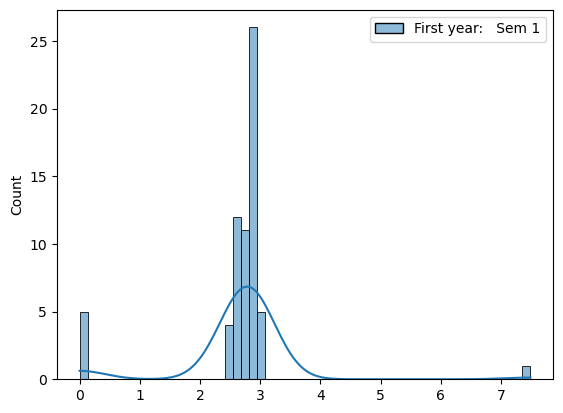

In [22]:
# this for first year sem1
from scipy.stats import boxcox

numeric_columns = ['First year:   Sem 1']

transformed_data = pd.DataFrame()
for column in numeric_columns:
    transformed_col, _ = boxcox(data[column] + 1) 
    transformed_data[column] = transformed_col


sns.histplot(transformed_data, kde=True)
plt.show()

transformed_data.to_csv('transformed_tecdiv.csv', index=False)


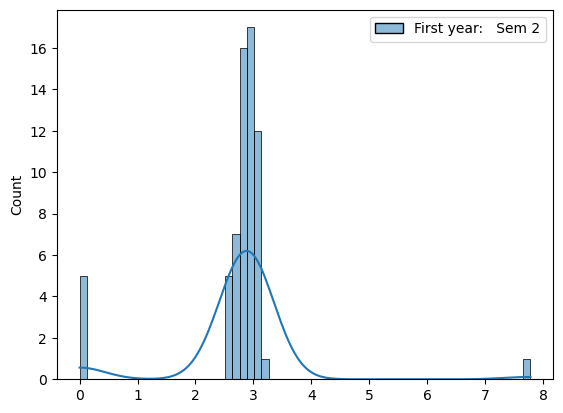

In [23]:
# this for first year sem1
from scipy.stats import boxcox

numeric_columns = ['First year:   Sem 2']

transformed_data = pd.DataFrame()
for column in numeric_columns:
    transformed_col, _ = boxcox(data[column] + 1) 
    transformed_data[column] = transformed_col


sns.histplot(transformed_data, kde=True)
plt.show()

transformed_data.to_csv('transformed_tecdiv.csv', index=False)

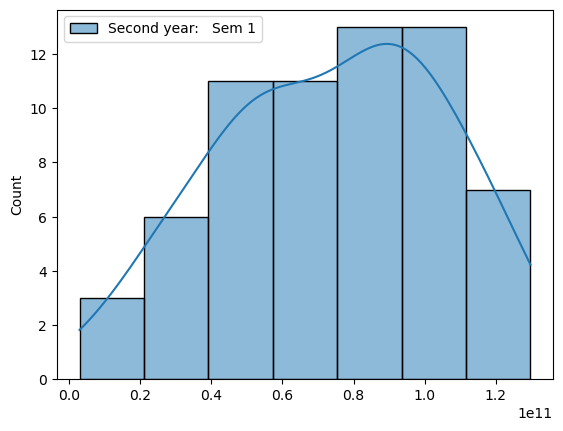

In [24]:
# this for second year sem1
from scipy.stats import boxcox

numeric_columns = ['Second year:   Sem 1']

transformed_data = pd.DataFrame()
for column in numeric_columns:
    transformed_col, _ = boxcox(data[column] + 1) 
    transformed_data[column] = transformed_col


sns.histplot(transformed_data, kde=True)
plt.show()

transformed_data.to_csv('transformed_tecdiv.csv', index=False)

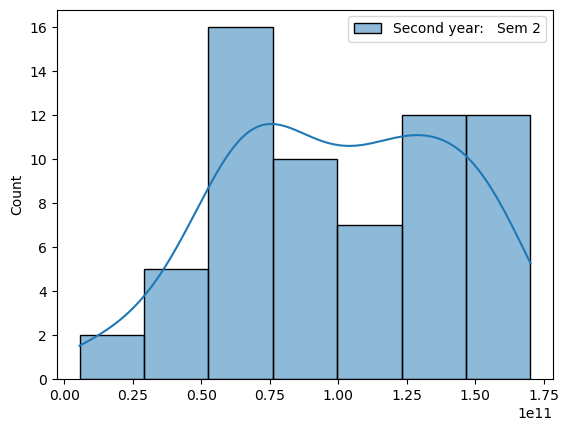

In [25]:
# this for second year sem2
from scipy.stats import boxcox

numeric_columns = ['Second year:   Sem 2']

transformed_data = pd.DataFrame()
for column in numeric_columns:
    transformed_col, _ = boxcox(data[column] + 1) 
    transformed_data[column] = transformed_col


sns.histplot(transformed_data, kde=True)
plt.show()

transformed_data.to_csv('transformed_tecdiv.csv', index=False)